# Week2　授業前課題4（任意課題）ダーツ投げ問題
ここでは、6つあるダーツのまとの中から一つ選びダーツを投げるシミュレーションを作成します。シミューレーションと言っても動画ではなく、以下のようなものを作成します。

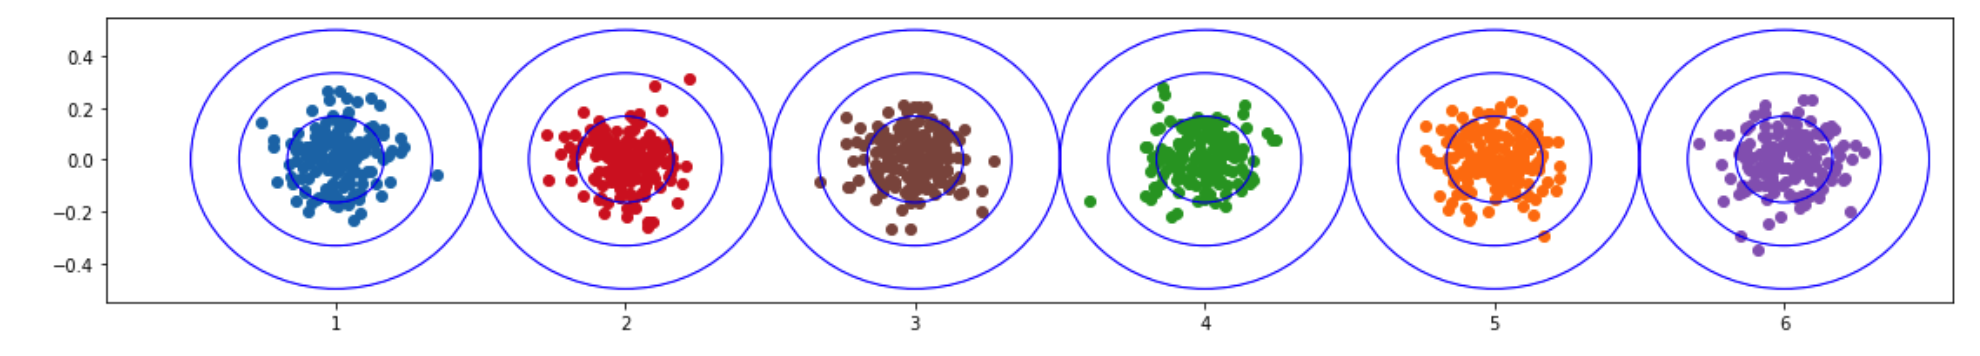

注意していただきたいのは、**ダーツのまとを選ぶ行為とダーツの矢が刺さる場所** をプログラミングでどう表現するかです。


そしてダーツ投げの実装を通して、確率分布やディクショナリについても学んでいきます。

### ダーツ投げのシミュレーションの作成
実装する上での前提条件を以下に示します。

- 複数のダーツのまとは、間を空けずに横一列に並んでいるとします。
- ある番号のまとに狙ったダーツは、他のまとには行かないとします。

実装するフローは以下になります。


- ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）
- サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）
- ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）
- 1～3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）
- 各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）

これらのフローを以下の問題を通じて一つ一つ実装していきましょう。

### 【問題1】ダーツのまとを選ぶ  
ダーツのまとを選ぶためにサイコロを実装しましょう。

In [1]:
# サイコロの実装
import numpy as np
def dice(n_eyes):
    eyes = list(range(1, n_eyes + 1))
    return np.random.choice(eyes)

# 例示
print(dice(6))

3


### 【問題2】ダーツを投げて、刺さった場所を記録する  
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。

In [2]:
# ダーツの刺さった場所を記録
mu = [dice(6), 0]
# σ^2 = (0.1)^2 = 0.01
cov = [[0.01, 0], [0, 0.01]]
point = np.random.multivariate_normal(mu, cov)

# 例示
print(mu)
print(point)
print(type(point))

[3, 0]
[3.01418543 0.0440584 ]
<class 'numpy.ndarray'>


### 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する  
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

In [3]:
# 的に応じ、ダーツの位置（リスト）を辞書に格納
from collections import defaultdict

# 同じkeyで上書きされないよう、リストを格納する辞書へ
#（ndarrayで格納を試みたができなかった）
dic_points = defaultdict(list)

#ダーツを1000本投げ、的をkeyとして辞書に格納
for d in range(1000):
    key = dice(6)
    mu = [key, 0]
    cov = [[0.01, 0], [0, 0.01]]
    dic_points[key].append(np.random.multivariate_normal(mu, cov))

print(len(dic_points))

6


### 【問題4】ダーツのまとと刺さった位置を描画する  
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

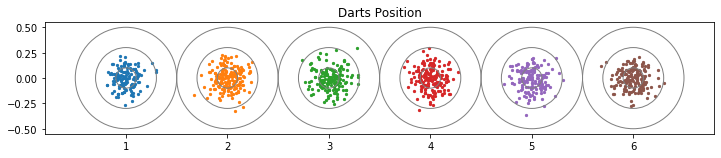

In [4]:
# 的とダーツの刺さった位置の描画
import matplotlib.path as mpath
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12.0, 8.0))
ax = plt.axes()

# 的ごとに描画
for i in range(1, 7):
    
    # 的として3つの円を表示
    c_1 = patches.Circle(xy=(i, 0), radius=0.5, fc='None', ec='gray')
    c_2 = patches.Circle(xy=(i, 0), radius=0.3, fc='None', ec='gray')
    c_3 = patches.Circle(xy=(i, 0), radius=0.1, fc='None', ec='gray')
    ax.add_patch(c_1)
    ax.add_patch(c_2)
    ax.add_patch(c_3)
    
    # 辞書からリストを出して配列に変換、スライスし散布として描画
    points_i = np.array(dic_points[i])
    plt.scatter(points_i[:, 0], points_i[:, 1], s=5)  

ax.set_aspect('equal') 
plt.title("Darts Position")
plt.show()

### 【問題5】関数化  
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

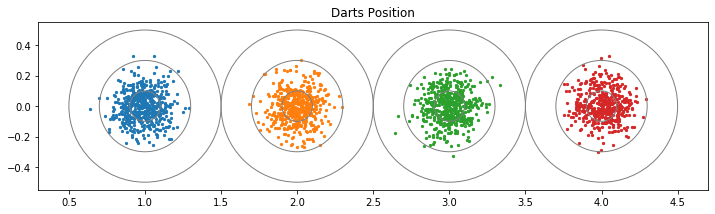

In [5]:
# ダーツ投げの関数化
def darts_simulation(n_target, n_dart):
    targets = list(range(1, n_target + 1))
    dic_points = defaultdict(list)
    
    # サイコロを振り、ダーツを投げ、位置を辞書に格納
    for d in range(n_dart):
        key = np.random.choice(targets)
        mu = [key, 0]
        cov = [[0.01, 0], [0, 0.01]]
        dic_points[key].append(np.random.multivariate_normal(mu, cov))
    
    # 的とダーツの刺さった位置を描画
    fig = plt.figure(figsize=(12.0, 8.0))
    ax = plt.axes()
    for i in range(1, n_target + 1):
        c_1 = patches.Circle(xy=(i, 0), radius=0.5, fc='None', ec='gray')
        c_2 = patches.Circle(xy=(i, 0), radius=0.3, fc='None', ec='gray')
        c_3 = patches.Circle(xy=(i, 0), radius=0.1, fc='None', ec='gray')
        ax.add_patch(c_1)
        ax.add_patch(c_2)
        ax.add_patch(c_3)
        points_i = np.array(dic_points[i])
        plt.scatter(points_i[:, 0], points_i[:, 1], s=5)  
    ax.set_aspect('equal') 
    plt.title("Darts Position")
    plt.show()

# 的の数：4, ダーツの数：2000で例示
darts_simulation(4, 2000)